# Flor: Small demo of new minimal syntax

In [1]:
# Import Flor
import flor

# If the notebook name has not already been set, you are able to set the name in code. 
flor.setNotebookName('tutorial.ipynb')

Simplest wrap

             precision    recall  f1-score   support

          0       0.73      0.72      0.72      5024
          1       0.72      0.73      0.72      4976

avg / total       0.72      0.72      0.72     10000



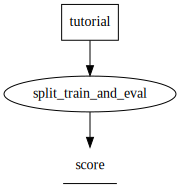

In [4]:
###################################
@flor.track_action('risecamp_demo')
def split_train_and_eval(**kwargs):
###################################
    import pandas as pd

    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
    movie_reviews = pd.read_json('data.json')
    movie_reviews['rating'] = movie_reviews['rating'].map(lambda x: 0 if x < 5 else 1)

    X_tr, X_te, y_tr, y_te = train_test_split(movie_reviews['text'], movie_reviews['rating'], 
                                              test_size=0.20, random_state=92)

    vectorizer = TfidfVectorizer()
    vectorizer.fit(X_tr)
    X_tr = vectorizer.transform(X_tr)
    X_te = vectorizer.transform(X_te)
    clf = RandomForestClassifier(n_estimators=7).fit(X_tr, y_tr)
    
    y_pred = clf.predict(X_te)

    score = clf.score(X_te, y_te)
    c = classification_report(y_te, y_pred)

    print(c)
    
    #######################
    return {'score': score}
    #######################
split_train_and_eval()

In [3]:
flor.Experiment('risecamp_demo').summarize()

,utag,score,tutorial
0,2018-10-07_06-47-15,0.7038,tutorial_139778414760736.ipynb


# Hyperparam Sweep

             precision    recall  f1-score   support

          0       0.73      0.73      0.73      5024
          1       0.73      0.73      0.73      4976

avg / total       0.73      0.73      0.73     10000

             precision    recall  f1-score   support

          0       0.72      0.71      0.72      5024
          1       0.71      0.72      0.72      4976

avg / total       0.72      0.72      0.72     10000



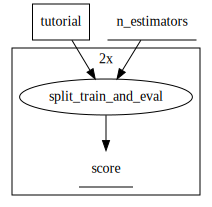

In [5]:
###################################
@flor.track_action('risecamp_demo')
def split_train_and_eval(n_estimators, **kwargs):
###################################
    import pandas as pd

    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report
    movie_reviews = pd.read_json('data.json')
    movie_reviews['rating'] = movie_reviews['rating'].map(lambda x: 0 if x < 5 else 1)

    X_tr, X_te, y_tr, y_te = train_test_split(movie_reviews['text'], movie_reviews['rating'], 
                                              test_size=0.20, random_state=92)

    vectorizer = TfidfVectorizer()
    vectorizer.fit(X_tr)
    X_tr = vectorizer.transform(X_tr)
    X_te = vectorizer.transform(X_te)
    clf = RandomForestClassifier(n_estimators=n_estimators).fit(X_tr, y_tr)
    
    y_pred = clf.predict(X_te)

    score = clf.score(X_te, y_te)
    c = classification_report(y_te, y_pred)

    print(c)
    
    #######################
    return {'score': score}
    #######################
    
split_train_and_eval([5, 7])

In [6]:
flor.Experiment('risecamp_demo').summarize()

,utag,score,n_estimators,tutorial
0,2018-10-07_06-54-28,0.7154,5.0,tutorial_139779114592072.ipynb
1,2018-10-07_06-54-28,0.7327,7.0,tutorial_139779114592072.ipynb
2,2018-10-07_06-51-41,0.7214,NaN,tutorial_139779312639224.ipynb
3,2018-10-07_06-47-15,0.7038,NaN,tutorial_139778414760736.ipynb
